## Изучение заĸономерностей, определяющих успешность игр

## Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xboxили PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Шаг 1. Изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating
Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает
им подходящую возрастную категорию

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод

Таблица состоит из 11 колонок и 16715 строк

Необходимо:
- привести названия колонок к нижнем регистру
- `Year_of_Release`, `Critic_Score` привести к целым числам
- `User_Score` привести к вещественному типу

В данных обнаружены пропуски, их изучим и по необходимости заполним.

## Шаг 2. Подготовка данных

#### Замена названия столбцов (приведение к нижнему регистру)

In [5]:
df.columns = df.columns.str.lower()

#### Проверка на пропуски

In [6]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Обнаруен пропуски в нескольких колонках, будем рассматривать ихпоочередно
колонках: `name`, `year_of_release`, critic_score, user_score, rating

#### name

In [7]:
df[df['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


2 пропуска в `name` совпадают с 2 пропусками в `genre`, удалим эти пропуски

In [8]:
# df.dropna(subset=['name'], inplace=True)
df = df[df['name'].isna() == False]

#### year_of_release

В колонке year_of_release 296 пропусков. Названия некоторых игр содержат год, предположим что эта цифра близка к году релиза

In [9]:
df[df['year_of_release'].isna() == True].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Напишем функцию которая вытаскивает из названия год если он находится в диапазоне 1985-2016

In [10]:
def year(row):
    years = [i for i in range(1985,2017)]
    name = row['name']
    text = name.split()
    text[-1]
    if text[-1].isnumeric():
        is_year = int(text[-1])
        if is_year in years:
            return is_year

применим функцию и заполним пропуски

In [11]:
df['year'] = df.apply(year,axis=1)

df['year_of_release'] = df['year_of_release'].fillna(df['year'])
df = df.drop(columns = ['year'],axis = 1)

/tmp/ipykernel_85/3337826172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df.apply(year,axis=1)
/tmp/ipykernel_85/3337826172.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_of_release'] = df['year_of_release'].fillna(df['year'])


In [12]:
df['year_of_release'].isna().sum()

254

Из 269 пропусков осталось 254, поскольку в дальнейшем анализ требуется делать в разрезе временных показателей, удалим эти строки.

In [13]:
df = df[df['year_of_release'].isna() == False]
df = df.astype({'year_of_release':int})

#### critic_score, user_score, rating

In [14]:
# Пропуски в оценке критиков
df[df['critic_score'].isna() == True].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Значительное количество игр осталось без оценок, хотя на первых строках мы видим явные хиты например Super Mario или Tetris. Видимо на момент их выхода оценки не практиковались. Так же можно предположить, что не все игры оценивались критиками по причине их малой популярности.

Заменим пропуски нулями, но предварительно проверим не занято ли это значение

In [15]:
df.query('critic_score == 0' or 'user_score == 0')['name'].count()

0

Заменим пропуски в critic_score, user_score на 0, rating на no_rating

In [16]:
# df.loc[df[['critic_score','user_score','rating']].isna(), [['critic_score','user_score','rating']]] = 0
df[['critic_score','user_score']] = df[['critic_score','user_score']].fillna(0)
df['rating'] = df['rating'].fillna('no_rating')

Проверка значений critic_score

In [17]:
df.critic_score.unique()

array([76.,  0., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

В колонке critic_score представлены целые числа, поэтому заменим на int

In [18]:
df = df.astype({'critic_score':int})

Проверка значений user_score

In [19]:
df.user_score.unique()

array(['8', 0, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В колонке user_score помимо пропусков присутствует значение 'tbd' (to be done - рейтинга ещё нет). Заменим его на 0 и изменим тип на числовое значение

In [20]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = 0
df['user_score'] = pd.to_numeric(df['user_score'])

Проверка значений rating

In [21]:
df.rating.unique()

array(['E', 'no_rating', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [22]:
# Проверка на пропуски
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Посчитаем суммарные продажи во всех регионах

In [23]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,no_rating
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,no_rating
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,no_rating
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,0.0,no_rating
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,no_rating
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,0.0,no_rating


In [24]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales']+df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,no_rating,31.38


### Вывод

В процессе подготовки данных:
- привели названия колонок к нижнему регистру,
- заменили типы данных в годе выпуска, оценке критиков и оценке пользователей,
- пропуски в годе выпуска заполнили из названия игр, что не заменилось удалили,
- пропуски в оценках и рейтинге были заменены на 0 подразумевая отсутствие значения,
- пропуски в названии игр были удалены,
- добавили колонку суммарных продаж.

### Шаг 3. Исследовательский анализ данных

#### Сколько игр выпускалось в разные годы

In [25]:
years = df.groupby('year_of_release',as_index=False)['platform'].count()
years.columns = ['year','count']

Text(0, 0.5, 'Количество')

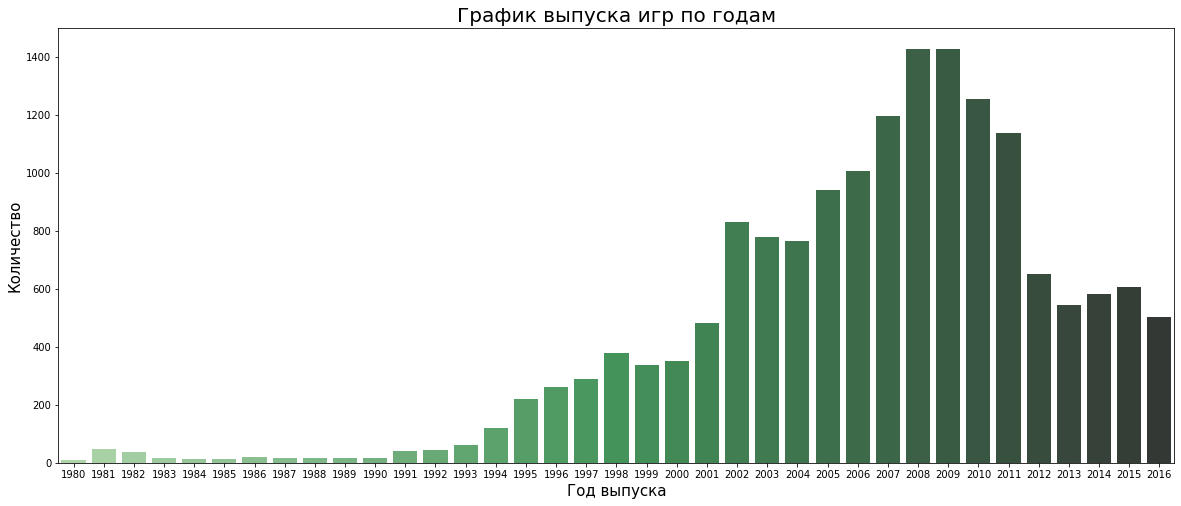

In [26]:
fig, ax = plt.subplots(figsize=(20, 8))

ax = sns.barplot(x='year', y='count', data=years, palette='Greens_d')

plt.title('График выпуска игр по годам',fontsize = 20)
plt.xlabel('Год выпуска',fontsize = 15)
plt.ylabel('Количество',fontsize = 15)

Пик выпуска новых игр приходится на 2008, 2009 годы, далее мы видим снижение. В 2012 году выпуск игр упал почти в 2 раза и дальше идет постепенное снижение. Проверим выручку по годам.

Посчитаем количество проданных копий по годам

In [27]:
sales = df.groupby('year_of_release',as_index=False)['total_sales'].sum()
sales.columns = ['year','sales']

Text(0, 0.5, 'Миллионы копий')

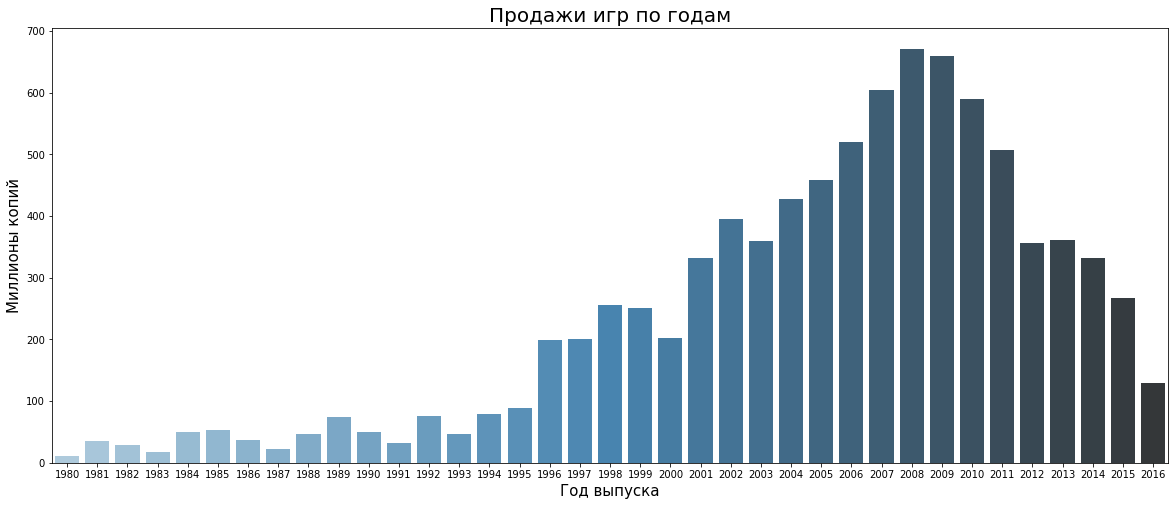

In [28]:
fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.barplot(x='year', y='sales', data=sales, palette='Blues_d')

plt.title('Продажи игр по годам',fontsize = 20)
plt.xlabel('Год выпуска',fontsize = 15)
plt.ylabel('Миллионы копий',fontsize = 15)

Пик продаж игр так же приходится на 2008 и 2009 годы. Даалее продажи падают, причем в последний 2016 продажи упали почти в 2 раза по сравнениб с 2015 годом.  

#### Как менялись продажи по платформам. Платформы с наибольшими суммарными продажами.

Выведем топ платформ по продажам больше 75 квартиля

In [29]:
platform_top = df.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
                .query('total_sales > total_sales.quantile(0.75)').sort_values(by='total_sales',ascending=False)
top = list(platform_top.index)
platform_top

,total_sales
platform,
PS2,1247.28
X360,961.30
PS3,931.34
Wii,891.18
DS,802.79
PS,727.58
PS4,314.14
GBA,312.88


Построим графики по продажам игр по топ платформам

In [30]:
# Сводная таблица топ платформ для графика
platform_sales = df.pivot_table(index='year_of_release',columns='platform',values='total_sales',aggfunc='sum')
platform_top_sales = platform_sales.loc[:, top]

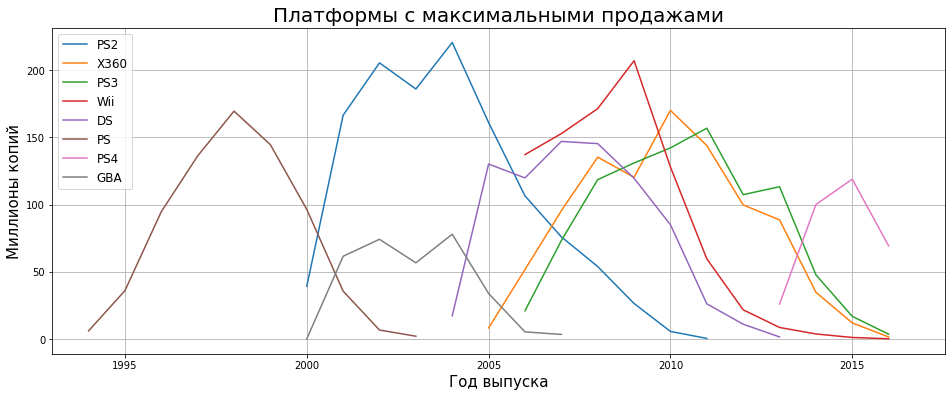

In [31]:
plt.figure(figsize=(16,6))

plt.plot(platform_top_sales.index, platform_top_sales)

plt.title('Платформы с максимальными продажами',fontsize = 20)
plt.xlim(left=1993)
plt.ylabel('Миллионы копий',fontsize = 15)
plt.xlabel('Год выпуска',fontsize = 15)
plt.legend(platform_top_sales,loc='upper left', fontsize=12)
plt.grid()

plt.show()

**Комментарий к графику**:
Хотя график и не очень крвсивый, по нему мы видим, явно прослеживается жизненный цикл платформы. Наблюдаем старт, рост, пик, падение продаж и закрытие платформы. С начала жизни игровой индустрии доминировали продукты SONY. После 2005 года активно подтянулись Nintendo и Microsoft. Для сохранения интереса пользователей к своим продуктам производители обновляли свои игровые платформы создавая цепочку их развития, как например PS-PS2-PS3-PS4.

В период 1995-2000 годы максимум продавалась платформа PS
2000-2005 - PS2
2005-2010 - Wii

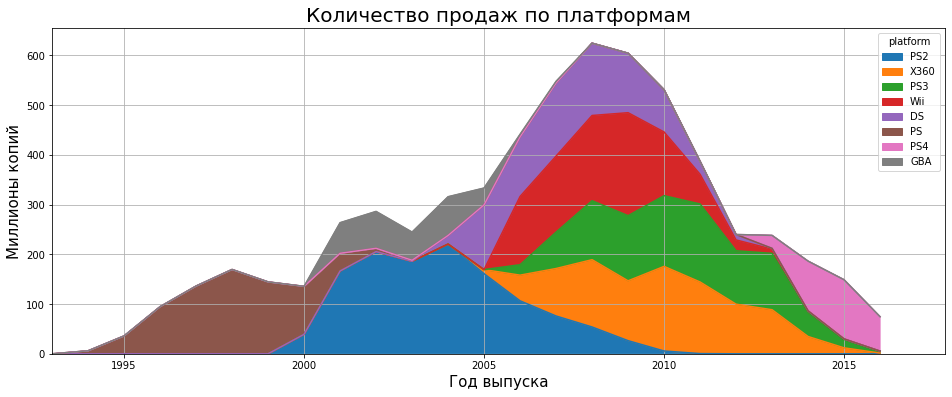

In [32]:
platform_top_sales.plot.area(figsize=(16,6))
plt.xlim(left=1993)

plt.title('Количество продаж по платформам',fontsize = 20)
plt.ylabel('Миллионы копий',fontsize = 15)
plt.xlabel('Год выпуска',fontsize = 15)
plt.grid()

**Комментарий к графику**:
График более информативен в разрезе продаж платформенной игровой индустрии. Как ранее было сказано, с начала доминировали продукты SONY. После 2005 года активно подтянулись Nintendo и Microsoft. В целом видим рост всей игровой индустрии до 2007 года, после пика идет явный спад и даже появление новых платформ не сильно влияет на общее снижение продаж.

#### За какой характерный срок появляются новые и исчезают старые платформы?

In [33]:
platform_lifetime = df.groupby('platform').agg({'year_of_release':['min','max']})#.sort_values(('year_of_release','min'))
platform_lifetime.columns = ['year_min','year_max']
platform_lifetime['lifetime'] = platform_lifetime['year_max']-platform_lifetime['year_min']+1

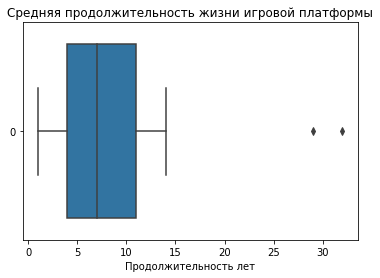

In [34]:
sns.boxplot(data=platform_lifetime['lifetime'], orient='h')

plt.title('Средняя продолжительность жизни игровой платформы')
plt.xlabel('Продолжительность лет')

plt.show()

In [35]:
platform_lifetime['lifetime'].median()

7.0

Средняя продолжительность жизни игровой платформы(медиана) составляет 7 лет. Поскольку есть платформы чей жизненный цикл к 2016 году еще не закончился, рассчитаем среднее по уже закрывшимся платформам

In [36]:
platform_lifetime.query('year_max < 2016')['lifetime'].mean()

8.0

Средняя продолжительность жизни игровой платформы 8 лет. При этом есть долгожители которые на момент 2016 года еще не закрылись.

#### Определим актуальный период для анализа данных
Посмотрим количество игрвых платформ актуальных в разрезе года выпуска игр

In [37]:
df.groupby(['year_of_release'],as_index=False)['platform'].nunique().sort_values(by='year_of_release',ascending=False).head(10)

,year_of_release,platform
36,2016,9
35,2015,10
34,2014,10
33,2013,11
32,2012,9
31,2011,9
30,2010,7
29,2009,7
28,2008,9
27,2007,11


Количество игровых платформ меняется с течением времени. Последний пик приходится на 2013 год затем идет снижение количества живых платформ. Предположим, что релевантные продажи игр вряд ли продолжаются больше 4 лет после релиза. Примем за актуальный период 2013-2016 годы.

In [38]:
actual_df = df.query('year_of_release >= 2013')

In [39]:
actual_sales = actual_df.pivot_table(index='year_of_release',columns='platform',values='total_sales',aggfunc='sum')
actual_sales

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Выведем графики продаж игр по платформам и их количество в общих продажах

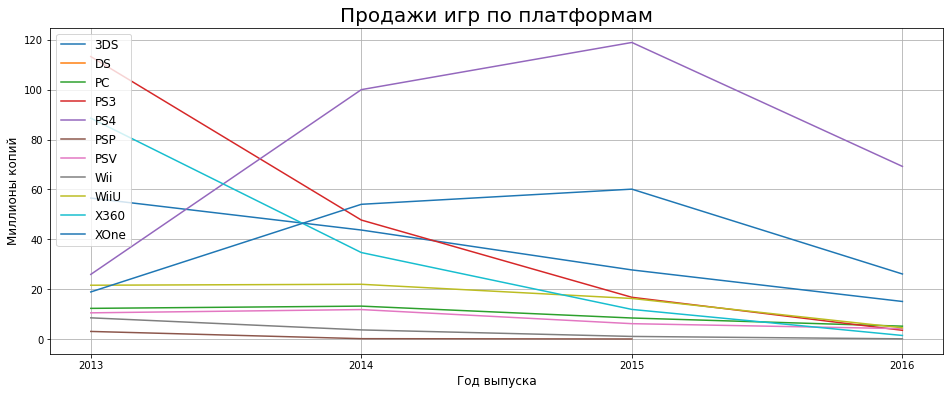

In [40]:
plt.figure(figsize=(16,6))

plt.plot(actual_sales.index, actual_sales)

plt.title('Продажи игр по платформам',fontsize = 20)

plt.ylabel('Миллионы копий',fontsize = 12)
plt.xlabel('Год выпуска',fontsize = 12)
plt.legend(actual_sales,loc='upper left', fontsize=12)
plt.grid()

plt.xticks([2013,2014, 2015, 2016])
plt.show()

<Figure size 1152x432 with 0 Axes>

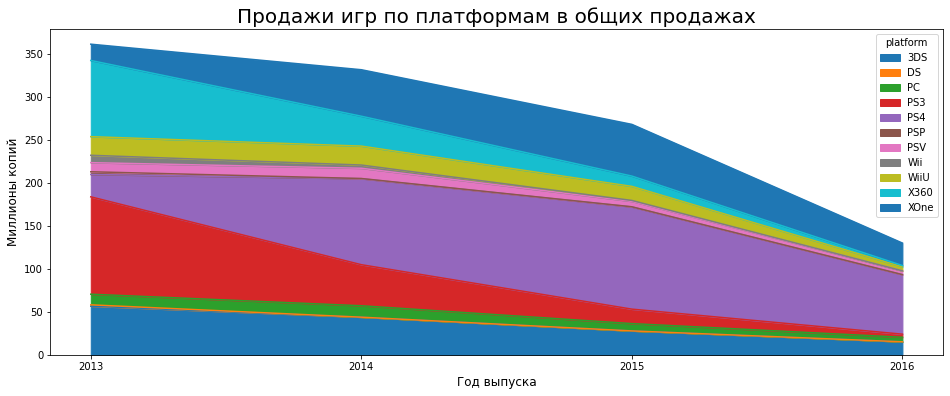

In [41]:
plt.figure(figsize=(16,6))
actual_sales.plot.area(figsize=(16,6))
plt.xticks([2014, 2015, 2016])
plt.title('Продажи игр по платформам в общих продажах',fontsize = 20)
plt.ylabel('Миллионы копий',fontsize = 12)
plt.xlabel('Год выпуска',fontsize = 12)

plt.xticks([2013,2014, 2015, 2016])

plt.show()

Мы видим 10 актуальных платформ. На первом месте PS4, на втором XOne, на третьем 3DS. Продажи всех платформ снизились. Посмотрим на жизненный цикл этих платформ

In [42]:
platform_lifetime.query('year_max > 2014').sort_values('lifetime',ascending=False)

,year_min,year_max,lifetime
platform,,,
PC,1985,2016,32
PSP,2004,2015,12
X360,2005,2016,12
PS3,2006,2016,11
Wii,2006,2016,11
3DS,2011,2016,6
PSV,2011,2016,6
WiiU,2012,2016,5
PS4,2013,2016,4


5 платформ явно перешагнули порог средней продолжительности жизни, из них PC явный долгожитель.  

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [43]:
#actual_sales

In [44]:
# plt.figure(figsize=(16,6))
# actual_sales.boxplot()

# plt.title('Продажи игр в разбивке по платформам за 2013-2016 годы',fontsize = 15)


In [45]:
actual_games = df[df['year_of_release'] > 2012]

(0.0, 2.0)

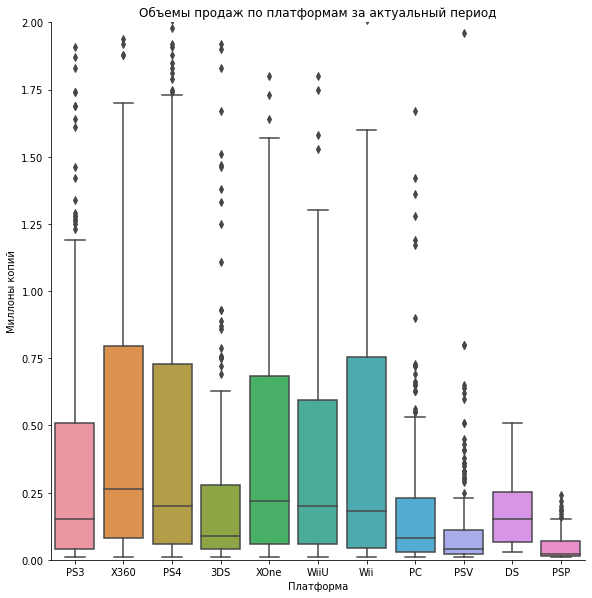

In [46]:
sns.catplot(x="platform", 
            y='total_sales', 
            kind="box", 
            data=actual_games, 
            orient='v',
            height=8)
plt.title('Объемы продаж по платформам за актуальный период')
plt.xlabel('Платформа')
plt.ylabel('Миллоны копий')
plt.ylim(0, 2)

**Комментарий**
Видим, что за выбранный актуальный период(2013-2016гг) в среднем продажи игр не достигают миллиона копий. При этом есть явные выбросы - бестселлеры с миллионными продажами. Особо отличаются игры на PS4, X360 и Wii

Посмотрим доли платформ в общих продажах за 2016 год

In [47]:
platform_2016 = actual_df.query('year_of_release == 2016').groupby('platform',as_index=False)['total_sales'].sum()

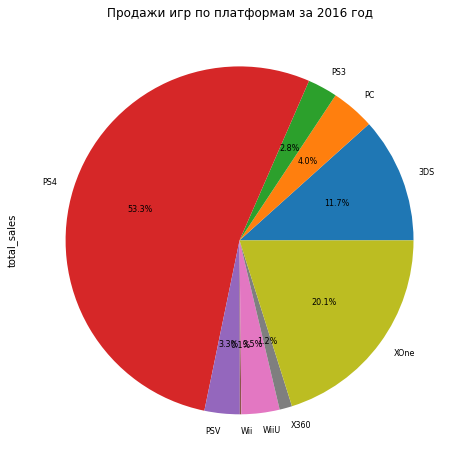

In [48]:
platform_2016['total_sales'].plot(kind='pie',labels=platform_2016['platform'],autopct="%.1f%%",fontsize=8,figsize=(8,8))

plt.title('Продажи игр по платформам за 2016 год')
plt.show()

Посчитаем изменения по выпуску игр и по продажам

In [49]:
change_in_years = actual_df.query('year_of_release > 2014')\
                 .pivot_table(index='platform',columns='year_of_release',values='total_sales',aggfunc=['count','sum'])

In [50]:
change_in_years['change_in_count'] = change_in_years[('count', 2016)]/change_in_years[('count', 2015)]
change_in_years['change_in_sum'] = change_in_years[('sum', 2016)]/change_in_years[('sum', 2015)]
change_in_years

count            sum        change_in_count change_in_sum
year_of_release   2015   2016    2015   2016                              
platform                                                                  
3DS               86.0   46.0   27.78  15.14        0.534884      0.544996
PC                50.0   54.0    8.52   5.25        1.080000      0.616197
PS3               73.0   38.0   16.82   3.60        0.520548      0.214031
PS4              137.0  164.0  118.90  69.25        1.197080      0.582422
PSP                3.0    NaN    0.12    NaN             NaN           NaN
PSV              110.0   85.0    6.25   4.25        0.772727      0.680000
Wii                4.0    1.0    1.14   0.18        0.250000      0.157895
WiiU              28.0   14.0   16.35   4.60        0.500000      0.281346
X360              35.0   13.0   11.96   1.52        0.371429      0.127090
XOne              80.0   87.0   60.14  26.15        1.087500      0.434819

In [51]:
print('Изменения в выпуске игр',change_in_years['change_in_count'].describe())
print()
print('Изменения в количестве продаж игр',change_in_years['change_in_sum'].describe())

Изменения в выпуске игр count    9.000000
mean     0.701574
std      0.345839
min      0.250000
25%      0.500000
50%      0.534884
75%      1.080000
max      1.197080
Name: change_in_count, dtype: float64

Изменения в количестве продаж игр count    9.000000
mean     0.404311
std      0.212793
min      0.127090
25%      0.214031
50%      0.434819
75%      0.582422
max      0.680000
Name: change_in_sum, dtype: float64


Графики показывают, что лидерами продажи на протяжении последних лет являются продукты Sony(PS3, PS4), Microsoft(X360, XOne) и Nintendo(WiiU,3DS). При этом продукты произведенные одной компании являются приемниками прошлых платформ. 

Мы видим что после 2015 года продажи всех платформ падают. При этом выпуск игр в среднем сократился на 30%(медиана 47%), продажа игр сократилась на 59%(медиана 56%).

Самыми продаваемыми платформами на 2016 являются PS4(51.1%), XOne(20.7%), 3DS(12.6%).

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Самой популярной платформой, из продаваемых в 2016 году, является PS4. Рассмотрим влияние отзывов на её примере.

Исключим из анализа игры которые не имеют рейтинга(значение 0).

#### Диаграмма рассеяния  между отзывами критиков и продажами

In [52]:
ps4_critic = df.query('platform == "PS4" and critic_score >0')

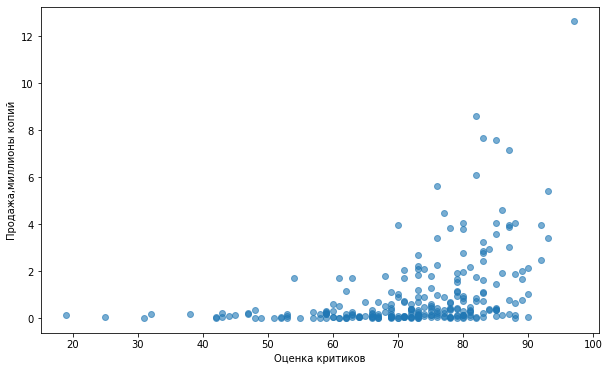

In [53]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x = ps4_critic['critic_score'], y = ps4_critic['total_sales'], alpha=0.6)
plt.xlabel("Оценка критиков")
plt.ylabel("Продажа,миллионы копий")

plt.show()

#### Диаграмма рассеяния  между отзывами пользователей и продажами

In [54]:
ps4_user = df.query('platform == "PS4" and user_score >0')

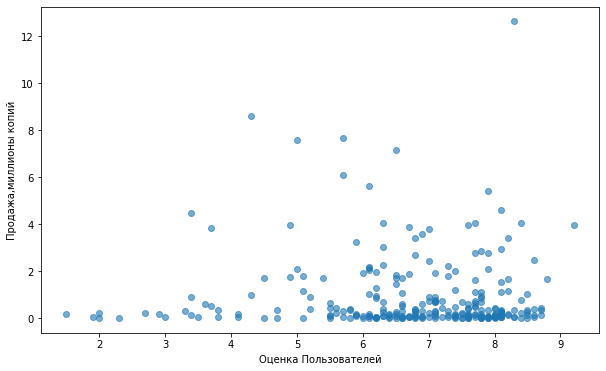

In [55]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(x = ps4_user['user_score'], y = ps4_user['total_sales'], alpha=0.6)
plt.xlabel("Оценка Пользователей")
plt.ylabel("Продажа,миллионы копий")

plt.show()

Посчитаем коэффициент корреляции оценки критиков и продаж

In [56]:
round(ps4_critic['critic_score'].corr(ps4_critic['total_sales']),2)

0.41

Посчитаем коэффициент корреляции оценки пользователей и продаж

In [57]:
round(ps4_user['user_score'].corr(ps4_user['total_sales']),2)

-0.03

Самая высокая оценка игры у критиков

In [58]:
ps4_critic_max = ps4_critic['critic_score'].max()
ps4_critic.query('critic_score == @ps4_critic_max')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


Самая высокая оценка игры у игроков

In [59]:
ps4_user_max = ps4_critic['user_score'].max()
ps4_user.query('user_score == @ps4_user_max')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
303,The Witcher 3: Wild Hunt,PS4,2015,Role-Playing,1.02,2.13,0.23,0.59,92,9.2,M,3.97


Коэффициент корреляции 0,41 между оценкой критиков и количеством продаж говорит о том, что между ними есть умереренная зависимость. Так максимальная оценка критиков совпадает с максимальными продажами игры. Оценка игроков и продажи не зависят друг от друга.

#### Проверим корреляцию продаж с отзывамии игр на топ платформах

In [60]:
#def platform_corr(plaforms):
for p in actual_games['platform'].unique():
    
    user = df.query('platform == @p and user_score >0')
    critic = df.query('platform == @p and critic_score >0')

    user_corr = round(user['user_score'].corr(user['total_sales']),2)
    critic_corr = round(critic['critic_score'].corr(critic['total_sales']),2)
    print('Платформа:', p)
    print('Корреляция между отзывами критиков и продажами:', critic_corr)
    print('Корреляция между отзывами игроками и продажами:', user_corr)
    print()

Платформа: PS3
Корреляция между отзывами критиков и продажами: 0.43
Корреляция между отзывами игроками и продажами: 0.13

Платформа: X360
Корреляция между отзывами критиков и продажами: 0.39
Корреляция между отзывами игроками и продажами: 0.11

Платформа: PS4
Корреляция между отзывами критиков и продажами: 0.41
Корреляция между отзывами игроками и продажами: -0.03

Платформа: 3DS
Корреляция между отзывами критиков и продажами: 0.35
Корреляция между отзывами игроками и продажами: 0.22

Платформа: XOne
Корреляция между отзывами критиков и продажами: 0.42
Корреляция между отзывами игроками и продажами: -0.07

Платформа: WiiU
Корреляция между отзывами критиков и продажами: 0.35
Корреляция между отзывами игроками и продажами: 0.4

Платформа: Wii
Корреляция между отзывами критиков и продажами: 0.18
Корреляция между отзывами игроками и продажами: 0.11

Платформа: PC
Корреляция между отзывами критиков и продажами: 0.26
Корреляция между отзывами игроками и продажами: 0.01

Платформа: PSV
Коррел

In [61]:
# for p in top:
#     user = actual_df.query('platform == @p and user_score >0')
#     critic = actual_df.query('platform == @p and critic_score >0')

#     user_corr = round(user['user_score'].corr(user['total_sales']),2)
#     critic_corr = round(critic['critic_score'].corr(critic['total_sales']),2)
#     print('Платформа:', p)
#     print('Корреляция между отзывами критиков и продажами:', critic_corr)
#     print('Корреляция между отзывами игроками и продажами:', user_corr)
#     print()

В целом можно сказать, что оценки критиков имеют умеренную зависимость с объёмом продаж. Оценки игроков практически не связаны с продажами.

#### Общее распределение игр по жанрам

In [62]:
genre_sales = actual_df.groupby('genre').agg({'total_sales':['count', 'sum']})

genre_sales.columns=['games','sales']
genre_sales['rate'] = genre_sales['sales']/genre_sales['games']
genre_sales.sort_values(('games'), ascending=False)


,games,sales,rate
genre,,,
Action,766,321.87,0.420196
Role-Playing,292,145.89,0.499623
Adventure,245,23.64,0.096490
Sports,214,150.65,0.703972
Shooter,187,232.98,1.245882
Misc,155,62.82,0.405290
Racing,85,39.89,0.469294
Fighting,80,35.31,0.441375
Platform,74,42.63,0.576081


In [63]:
# genre_sales['games'].plot(kind='pie',labels=genre_sales.index,autopct="%.1f%%",fontsize=8,figsize=(8,8))

# plt.title('Количесство выпущенных игр по жанрам %')
# plt.show()

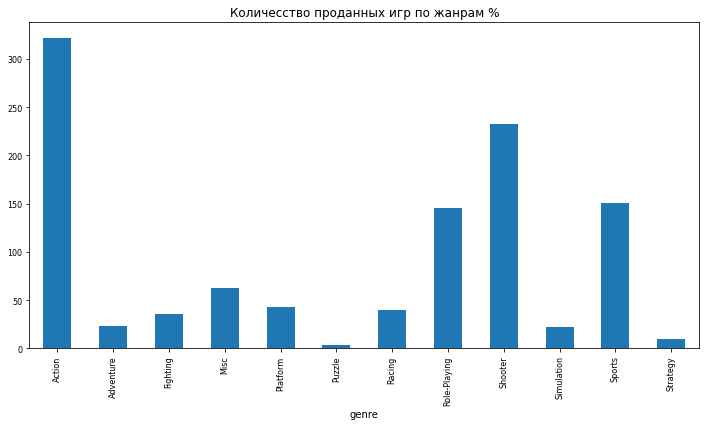

In [64]:
genre_sales['sales'].plot(kind='bar',fontsize=8,figsize=(12,6))

plt.title('Количесство проданных игр по жанрам %')
plt.show()

In [65]:
# genre_sales['sales'].plot(kind='pie',labels=genre_sales.index,autopct="%.1f%%",fontsize=8,figsize=(8,8))

# plt.title('Количесство проданных игр по жанрам %')
# plt.show()

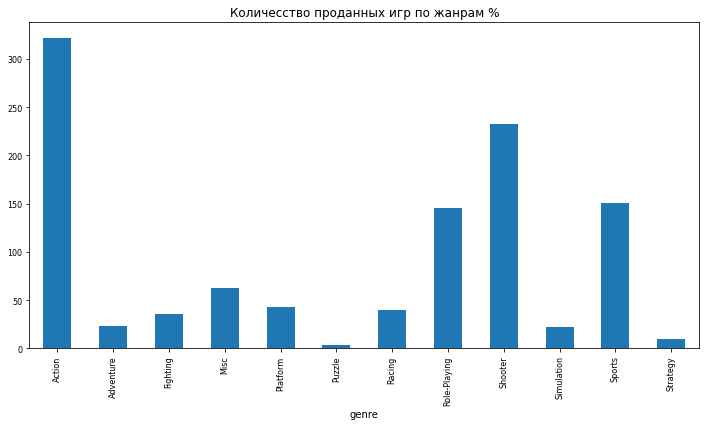

In [66]:
genre_sales['sales'].plot(kind='bar',fontsize=8,figsize=(12,6))

plt.title('Количесство проданных игр по жанрам %')
plt.show()

Самое большое количество выпущенных и проданных игр приходится на жанр Action, 34.3% и 29,3%. Коэффициент проданных копий игр к выпущенным играм у Action составляет 0,372, те 372 тыс проданных копий на каждую выпущенную игру. При этом самый эффетивный и второй по количеству продаж является жанр Shooter с коэффициентом 1,092.

### Вывод

Пик выпуска новых игр приходится на 2008, 2009 годы, далее мы видим снижение. В 2012 году выпуск игр упал почти в 2 раза и дальше идет постепенное снижение.

Пик продаж игр так же приходится на 2008 и 2009 годы. Даалее продажи падают, причем в последний 2016 продажи упали почти в 2 раза по сравнениб с 2015 годом. 

Самыми продаваемыми игровыми платформами за все время являются PS2, X360 и Wii.

Средняя продолжительность жизни игровой платформы 8 лет. При этом есть долгожители например PC чья продолжительсть составляет 32 года и на момент 2016 года еще не закрылась.

Последний пик роста количества игровых платформ приходится на 2013 год затем идет снижение. После 2015 года продажи всех платформ падают. При этом выпуск игр в среднем сократился на 30%(медиана 47%), продажа игр сократилась на 59%(медиана 56%). Актуальными на 2016 год осталось 9 платформ. Из которых на 3 платформы приходится 84,4% продаж PS4(51.1%), XOne(20.7%), 3DS(12.6%).

Самый непопулярным жанром является Puzzle с нименьшим количеством продаж 0,3% и коэффициентом продаж 0,177

На продажи игр в небольшой степени влияют оценки критиков и абсолютно не влияют оценки игроков.
Самыми популярными по продажам являются игры жанров Action(29,3%), Shooter(21,0%) и Sports(13.5%)

Оценивать продажи все-таки имеет смысл не только в количестве проданных игр, но и в денежном выражении. Информации по выручке нет.

## Шаг 4. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

## Шаг 4. Составим портрет пользователя каждого региона

Исследовать будем за актуальный период 2013-2016 годы.

### Самые популярные платформы (топ-5)

In [67]:
na_sales = actual_df.groupby('platform',as_index=False)['na_sales'].sum().nlargest(5, 'na_sales')
eu_sales = actual_df.groupby('platform',as_index=False)['eu_sales'].sum().nlargest(5, 'eu_sales')
jp_sales = actual_df.groupby('platform',as_index=False)['jp_sales'].sum().nlargest(5, 'jp_sales')

<AxesSubplot:title={'center':'Продажи платформ в Японии'}>

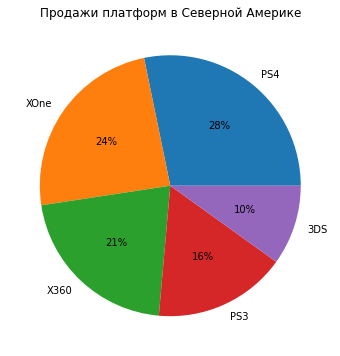

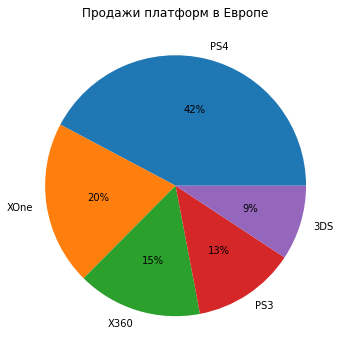

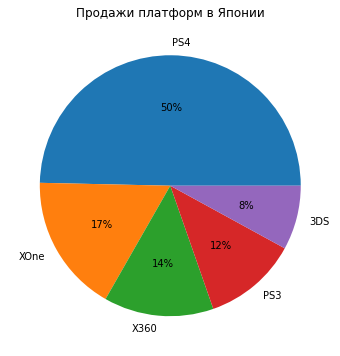

In [68]:
na_sales.plot(kind='pie',y="na_sales", autopct='%1.0f%%', legend=False, labels=na_sales['platform'],
              title = "Продажи платформ в Северной Америке", figsize=(6,6),ylabel='')
eu_sales.plot(kind='pie',y="eu_sales", autopct='%1.0f%%', legend=False,  labels=na_sales['platform'],
              title = "Продажи платформ в Европе", figsize=(6,6),ylabel='')
jp_sales.plot(kind='pie',y="jp_sales", autopct='%1.0f%%', legend=False,  labels=na_sales['platform'],
              title = "Продажи платформ в Японии", figsize=(6,6),ylabel='')

Самой популярной платормой во всех 3 регионах является PS4. Но в Японии на нее приходится 50%, а в Северной Америке 28%, Европа 42%. Распределение может быть связано со страной происхождения платформы которые представлены всего 2 странами США и Япония. Соответственно в Японии большую долю занимают Sony(PS3,PS4),Nintendo(3DS) - 70% рынка и Microsoft(X360,XOne) - 30% рынка. А в Северной Америке Microsoft - 45% рынка и 55% Sony,Nintendo.

In [69]:
actual_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0.0,no_rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0,0.0,no_rating,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,no_rating,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0,0.0,no_rating,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,no_rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,no_rating,0.01


### Самые популярные жанры (топ-5)

In [70]:
na_genres = actual_df.groupby('genre',as_index=False)['na_sales'].sum().nlargest(5, 'na_sales')
eu_genres = actual_df.groupby('genre',as_index=False)['eu_sales'].sum().nlargest(5, 'eu_sales')
jp_genres = actual_df.groupby('genre',as_index=False)['jp_sales'].sum().nlargest(5, 'jp_sales')

In [71]:
na_genres

,genre,na_sales
0,Action,126.05
8,Shooter,109.74
10,Sports,65.27
7,Role-Playing,46.40
3,Misc,27.49


<AxesSubplot:title={'center':'Популярные жанры в Японии'}>

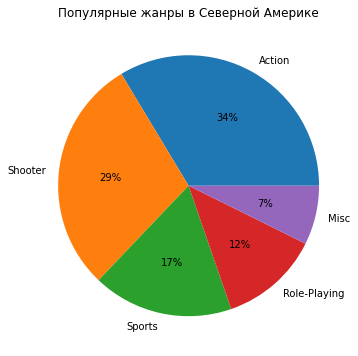

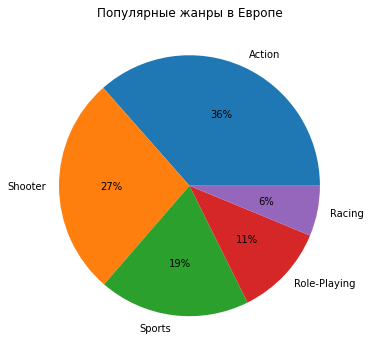

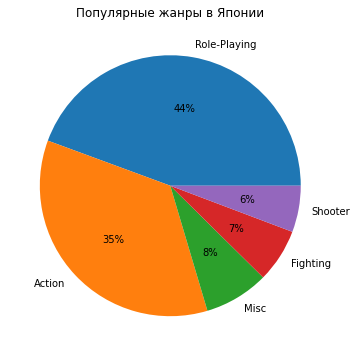

In [72]:
na_genres.plot(kind='pie',y="na_sales", autopct='%1.0f%%', legend=False, labels=na_genres['genre'],
              title = "Популярные жанры в Северной Америке", figsize=(6,6),ylabel='')
eu_genres.plot(kind='pie',y="eu_sales", autopct='%1.0f%%', legend=False, labels=eu_genres['genre'],
              title = "Популярные жанры в Европе", figsize=(6,6),ylabel='')
jp_genres.plot(kind='pie',y="jp_sales", autopct='%1.0f%%', legend=False, labels=jp_genres['genre'],
              title = "Популярные жанры в Японии", figsize=(6,6),ylabel='')

По жанрам Северная Америка не сильно отличается от Европы. На первом месте Action 34% и 36%. На втором Shooter 29% и 27%. В Японии своя атмосфера, там на первом месте Role-Playing 44% и только на втором месте Action 35%. Видимо связано с тем что RPg дает возможность прокачивать и совершенствовать своего героя больше развивая его характеристики, а не убивая соперников.

### Влияение рейтинга ESRB на продажи в отдельном регионе

**Entertainment Software Rating Board**
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»

In [73]:
na_rating = actual_df.groupby('rating',as_index=False)['na_sales'].sum()
eu_rating = actual_df.groupby('rating',as_index=False)['eu_sales'].sum()
jp_rating = actual_df.groupby('rating',as_index=False)['jp_sales'].sum()

<AxesSubplot:title={'center':'Влияение рейтинга ESRB на продажи в Японии'}>

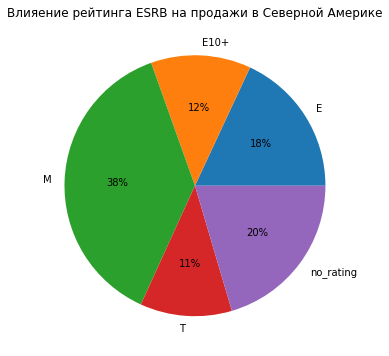

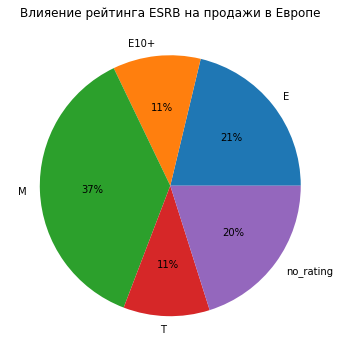

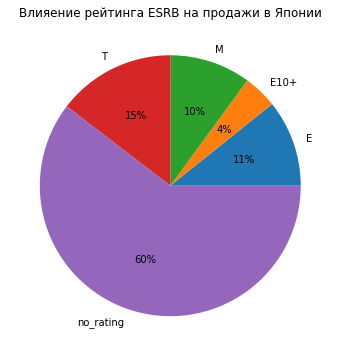

In [74]:
na_rating.plot(kind='pie',y="na_sales", autopct='%1.0f%%', legend=False, labels=na_rating['rating'],
               title = "Влияение рейтинга ESRB на продажи в Северной Америке", figsize=(6,6),ylabel='')
eu_rating.plot(kind='pie',y="eu_sales", autopct='%1.0f%%', legend=False, labels=eu_rating['rating'],
               title = "Влияение рейтинга ESRB на продажи в Европе", figsize=(6,6),ylabel='')
jp_rating.plot(kind='pie',y="jp_sales", autopct='%1.0f%%', legend=False, labels=jp_rating['rating'],
               title = "Влияение рейтинга ESRB на продажи в Японии", figsize=(6,6),ylabel='')

Доля рейтингов у Европы и Северной Америки мало различаются. На первом месте рейтинг «M» («Mature») — «Для взрослых». Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории. Что соответствует популярным жанрам Action  Shooter. В японии около 60% игр вообще не имеют рейтинга поскольку ESRB не является обязательным и принадлежит Северной Америке.

## Шаг 5. Проверка гипотез

### Проверка  гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем гипотезы:

    Нулевая гипотеза H₀: средние пользовательские рейтинги платформ Xbox One и PC не различаются
    Альтернативная гипотеза H₁: средние пользовательские рейтинги платформ Xbox One и PC различаются

Уровень значимости устанавливаем α = 5%, как общепринятое пороговое значение.

Зададим 2 выборки для Xbox One и PC

In [75]:
xone = actual_df.query('platform == "XOne" and user_score > 0')
pc = actual_df.query('platform == "PC" and user_score > 0')

Посмотрим на сравниваемые средние

In [76]:
print('Средний пользовательский рейтинг Xbox One:',xone['user_score'].mean())
print('Средний пользовательский рейтинг PC:      ',pc['user_score'].mean())

Средний пользовательский рейтинг Xbox One: 6.521428571428572
Средний пользовательский рейтинг PC:       6.2696774193548395


In [77]:
alpha = .05

results = st.ttest_ind(xone['user_score'], pc['user_score'], equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


### Проверка  гипотезы: Средние пользовательские рейтинги жанров Action и Sports разные

Сформулируем гипотезы:

    Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports не различаются
    Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются

Уровень значимости устанавливаем α = 5%, как общепринятое пороговое значение.

Зададим 2 выборки для Action и Sports

In [78]:
action = actual_df.query('genre == "Action" and user_score > 0')
sports = actual_df.query('genre == "Sports" and user_score > 0')

Посмотрим на сравниваемые средние

In [79]:
print('Средний пользовательский рейтинг Action:',action['user_score'].mean())
print('Средний пользовательский рейтинг Sports:',sports['user_score'].mean())

Средний пользовательский рейтинг Action: 6.837532133676092
Средний пользовательский рейтинг Sports: 5.238124999999999


In [80]:
alpha = .05

results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.4460039700704315e-20
Отвергаем нулевую гипотезу


**Вывод**

    Мы подтвердили гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    И опровергли гипотезу: Средние пользовательские рейтинги жанров Action и Sports разные

## Шаг 6. Общий вывод


Нам были предоставлени данные по выпуску и продаже игр за период 1980-2016 годы. Пик выпуска новых игр приходится на 2008, 2009 годы. Пик продаж игр так же приходится на 2008 и 2009 годы. Далее мы видим снижение и выпуска и продаж. Что связано с появлением и развитием мобильных игр.

Самыми продаваемыми игровыми платформами за все время являются PS2, X360 и Wii, которые в свою очередь были заменены своими приемниками.

На всем изучаемом периоде количество игровых платформ менялось. Средняя продолжительность жизни игровой платформы 8 лет. Последний пик роста количества игровых платформ приходится на 2013 год и составил 11 платформ, затем идет снижение. Актуальными на 2016 год осталось 9 платформ. Из которых на 3 платформы приходится 84,4% продаж PS4(51.1%), XOne(20.7%), 3DS(12.6%).
Указанные платформы являютя приемниками PS3, X360 и DS.

Самыми популярными по продажам являются игры жанров Action(29,3%), Shooter(21,0%) и Sports(13.5%)

На продажи игр в небольшой степени влияют оценки критиков и абсолютно не влияют оценки игроков.

При планировании продаж на 2017 год, необходимо ориентироваться на игровые платформы PS4 и XOne как самые молодые платформы находящиеся в средение своего жизненного цикла.

Соответственно для Японии юолее актуально продукция Sony(PS3, PS4) И Nintendo(Wii) для Северной Америки Microsoft(X360,XOne)

В северной Америке и Европе следует обращать внимание на игры в жанрах Action или Shooter. В Японии RPg.
Влияние на итоговые продажи могутоказать оценки критиков. Оценки игроков таким влиянием не обладают.

В целом можно сказать, что по аналогии с 2016 годом можно ожидать 2 кратное падение продаж. Поскольку выпуск новых игр снижается как и их продажи. Поэтому стоит задуматься о сокращении затрат исходя из планируемого сокращения продаж.